In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.datasets import make_swiss_roll

In [3]:
n_samples = 10_000
data, _ = make_swiss_roll(n_samples)
data = data[:, [2,0]] / 10
data = data *np.array([1, -1])

(-2.0, 2.0)

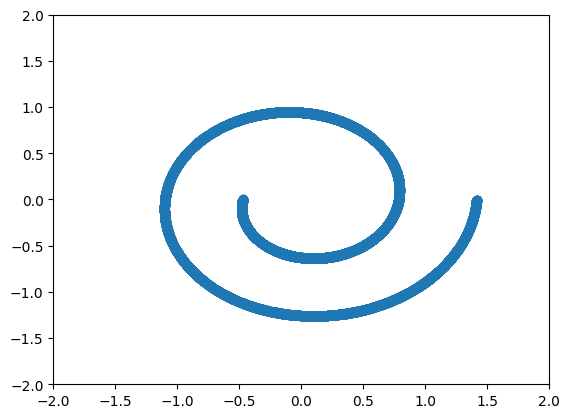

In [4]:
plt.scatter(data[:, 0], data[:, 1])
plt.xlim([-2,2])
plt.ylim([-2,2])

In [6]:
class DiffusionModel():
    def __init__(self, T):
        self.betas = torch.sigmoid(torch.linspace(-18, 10, T)) * (3e-1 - 1e-5) + 1e-5 # scaling data
        self.alphas = 1-self.betas
        self.alphas_bar = torch.cumprod(self.alphas, 0)


    def forward_process(self, data, t=40):

        for t in range(T):

            beta_t = betas[t]
            mu = data * torch.sqrt(1 - beta_t)
            std = torch.sqrt(beta_t)
            # Sample from q(x_t | x_{t-1})
            data = mu + torch.randn_like(data) * std # data ~ N(mu, std) 
            
        return data

In [ ]:
model = DiffusionModel(40)

In [7]:
def forward_process(data, T, betas):

    for t in range(T):

        beta_t = betas[t]
        mu = data * torch.sqrt(1 - beta_t)
        std = torch.sqrt(beta_t)
        # Sample from q(x_t | x_{t-1})
        data = mu + torch.randn_like(data) * std # data ~ N(mu, std)
        
    return data

In [8]:
T = 40
betas = torch.sigmoid(torch.linspace(-18, 10, T)) * (3e-1 - 1e-5) + 1e-5 # scaling data

xT = forward_process(torch.from_numpy(data), 40, betas)

In [9]:
print(xT.mean(0))
print(xT.std(0))

tensor([-0.0054, -0.0065], dtype=torch.float64)
tensor([0.9926, 1.0085], dtype=torch.float64)


(-2.0, 2.0)

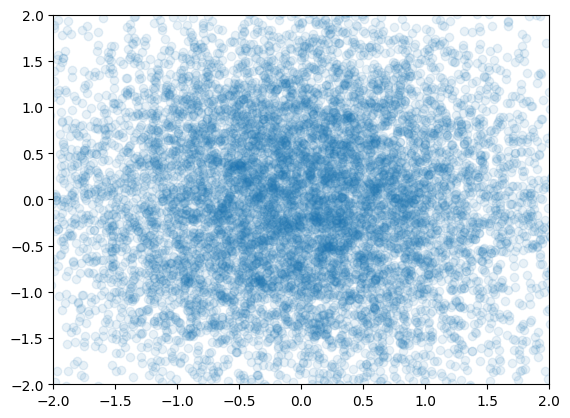

In [10]:
plt.scatter(xT[:, 0].data.numpy(), xT[:, 1].data.numpy(), alpha=0.1)
plt.xlim([-2,2])
plt.ylim([-2,2])